In [0]:
#instlacja potrzenych rzeczy aby pobrac dane z dataworld
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
#konfiguracja dataworld - wklic token ze stony dataworld (settings -> Advanced klucz Read/Write)
#!dw configure

In [0]:
#import bibliotek
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw


In [59]:
#montowanie dysku klucz z googla skopiowac aby sie uwierzytelnic
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
ls

drive/  sample_data/


In [19]:
cd "drive/My Drive/Colab Notebooks/DW_Matrix"

/content/drive/My Drive/Colab Notebooks/DW_Matrix


In [0]:
#katalog na dane
!mkdir data

In [0]:
#aby git ognorowal plili z katalogu data z danymi aby nie wypchac na githuba
!echo 'data' > .gitignore


In [0]:
!git add .gitignore

In [0]:
#wczytanie danych dane z linka dataworld user/zbior danych
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [26]:
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [27]:

#df i pobranie za pomoca id
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [29]:
#rozmiar df
df.shape

(19387, 48)

In [31]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
1059,AVpfHAZailAPnD_xVJKC,NaN,Baffin,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-11-11T09:49:14Z,2016-11-11T09:49:14Z,"[{""dateSeen"":[""2016-11-11T09:49:14Z""],""sourceU...",NaN,5.978179e+10,"[{""key"":""Shoe Size"",""value"":[""12""]},{""key"":""Si...",NaN,https://i5.walmartimages.com/asr/435756cc-c9e3...,NaN,"059781787143,0059781787143,baffin/6140000055912",Baffin,61400000 559 12,"[{""dateSeen"":[""2016-11-11T09:49:14Z""],""name"":""...",Baffin Lightning Boot Size 12,186.78,186.78,NaN,NaN,new,NaN,USD,2016-11-11T09:49:14Z,2016-11-05T00:00:00Z,NaN,false,21 Motorsports - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Baffin-61400000-559...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Baffin-61400000-559...,059781787143,NaN,NaN,NaN
19340,AVpfdUEFLJeJML439jYN,NaN,Tretorn,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Blue,NaN,2016-11-15T12:58:48Z,2016-11-15T12:58:48Z,"[{""dateSeen"":[""2016-11-15T12:58:48Z""],""sourceU...",NaN,8.851174e+11,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/721733d1-3b76...,NaN,"885117448989,0885117448989,tretorn/47317502",Tretorn,473175 02,"[{""dateSeen"":[""2016-11-15T12:58:48Z""],""name"":""...",Tretorn Racket H Low Men Round Toe Canvas Blu...,24.98,24.98,NaN,NaN,new,NaN,USD,2016-11-15T12:58:48Z,2016-11-09T00:00:00Z,NaN,true,ApparelSave - Walmart.com,CLEARANCE USD 70.02,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Tretorn-Racket-H-Lo...,NaN,NaN,NaN,"10.5,8.5,10,7,9.5,7.5,9,11.5,8,13,11,12",NaN,https://www.walmart.com/ip/Tretorn-Racket-H-Lo...,885117448989,NaN,NaN,NaN
9882,AVpe4A1bilAPnD_xPzIz,NaN,Calvin Klein,"Clothing,Shoes,Men's Shoes,Men's Casual Shoes",NaN,NaN,2016-11-06T23:59:22Z,2016-11-06T23:59:22Z,"[{""dateSeen"":[""2016-11-06T23:59:22Z""],""sourceU...",NaN,8.885424e+11,"[{""key"":""Heel Height"",""value"":[""Low (3/4 in. t...",NaN,https://i5.walmartimages.com/asr/1dd89539-ca81...,NaN,"calvinklein/f1513nvy,888542383511,0888542383511",Calvin Klein,F1513-NVY,"[{""dateSeen"":[""2016-11-06T23:59:22Z""],""name"":""...",Calvin Klein Homer Round Toe Canvas Oxford,65.99,65.99,NaN,NaN,new,NaN,USD,2016-11-06T23:59:22Z,2016-11-05T00:00:00Z,NaN,true,ApparelSave - Walmart.com,REDUCED USD 64.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Calvin-Klein-Homer-...,NaN,NaN,NaN,"11,10.5,9.5",NaN,https://www.walmart.com/ip/Calvin-Klein-Homer-...,888542383511,NaN,NaN,NaN
16749,AVpfToNz1cnluZ0-iQmC,NaN,Blue Tongue,"Clothing,Shoes,Men's Shoes,All Men's Shoes,Gar...",NaN,NaN,2015-06-15T12:53:50Z,2016-10-05T16:56:28Z,"[{""dateSeen"":[""2016-06-16T14:42:28Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Manu...",NaN,https://i5.walmartimages.com/asr/6c31b1b7-ecb5...,NaN,"bluetongue/btcst85,black6sliponcompositetoesaf...",Blue Tongue,BTCST8.5,"[{""address"":""5631 Dempster St"",""availability"":...","""Black 6"" Slip On Composite Toe Safety Boot","Size 8.5""",99.5,99.5,NaN,NaN,New,NaN,USD,2015-11-16T08:10:14Z,2015-11-06T00:00:00Z,NaN,false,autoplicity.com,NaN,Most products at Autoplicity.com are eligible ...,NaN,NaN,NaN,http://autoplicity.com/5046571-blue-tongue-btc...,NaN,NaN,"[{""date"":""2014-02-02T02:57:00Z"",""dateAdded"":""2...",NaN,NaN,https://www.walmart.com/ip/Black-6-Slip-On-Com...,NaN,NaN,NaN
2377,AVpfFCct1cnluZ0-dcA7,NaN,Zephyr,"Clothing, Shoes, Accessories,Men's Accessories...",NaN,NaN,2016-05-09T14:11:38Z,2016-05-09T14:11:38Z,NaN,NaN,6.323894e+11,"[{""key"":""Condition"",

In [32]:
#kolumny w df
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [33]:

#unikalne wartosc w prices_currency
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [35]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
New with box                                              3
PalmBeach Jewelry - Walmart.com                           3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
New without tags                                          1
Name: prices_currency, dtype: int64

In [36]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
New with box                                          0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
SHOEBACCA LTD. - Walmart.com                          0.000052
Shoes.com                                             0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[df.prices_currency =="USD"].copy()



In [38]:
df_usd.shape

(18524, 48)

In [39]:
#typ object zrzutujemy na float
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

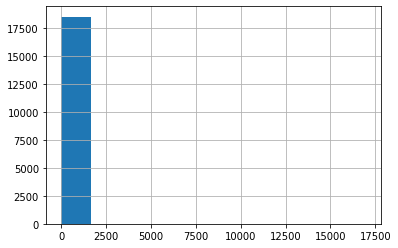

In [41]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [43]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
filter_max

895.0

In [0]:
df_usd_filter = df_usd [df_usd['prices_amountmin'] < filter_max ]

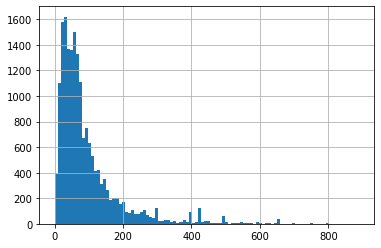

In [46]:
df_usd_filter.prices_amountmin.hist(bins=100)

In [47]:
ls

data/  HelloGitHub.ipynb  LICENSE  matrix_one/  README.md


In [49]:
ls matrix_one/day3_matrix.ipynb

day3_matrix.ipynb


In [0]:
!git add matrix_one/day3_matrix.ipynb

In [51]:
!git commit -m "Read Men's Shoe Prices dataset fropm data.world"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@8e1c805fe5bb.(none)')


In [0]:
!git config --global user.email "skrzyp1984@o2.pl"
!git config --global user.name "toskpl"

In [58]:
!git push -u origin master

To https://github.com/toskpl/DW_Matrix.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'https://5adc316abee96bdae414fd0b7a39b7802dbda847@github.com/toskpl/DW_Matrix.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
